# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):

    w1, w2, theta = 0.5, 0.5, 0.7
    result = x1*w1 + x2*w2

    return 1 if result > theta else 0
    


def NAND(x1, x2):

    w1, w2, theta = -0.5, -0.5, -0.7

    result = x1*w1 + x2*w2

    return 1 if result > theta else 0

def OR(x1, x2):

    w1, w2, theta = 0.5, 0.5, 0.2

    result = x1*w1 + x2*w2

    return 1 if result > theta else 0

# 위 논리 게이트를 조합하여 XOR gate 구현해주세요

def XOR(x1, x2):
    # XOR는 NAND, OR, AND 게이트를 조합하여 만들 수 있습니다.
    nand_result = NAND(x1, x2)
    or_result = OR(x1, x2)
    xor_result = AND(nand_result, or_result)
    return xor_result


## 활성함수 구현

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(np.int32)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


In [164]:
# STEP 함수 구현
def step_function(x):
    
    return np.where(x >0,1,0)

# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


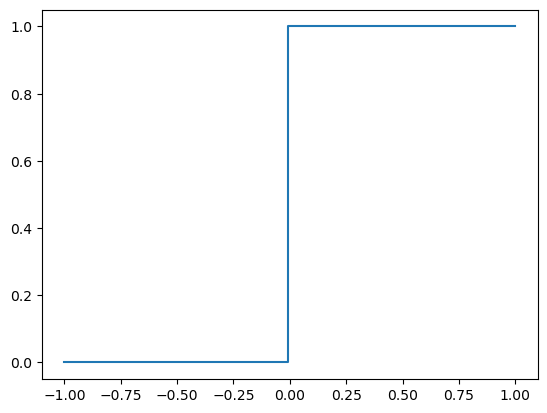

In [165]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


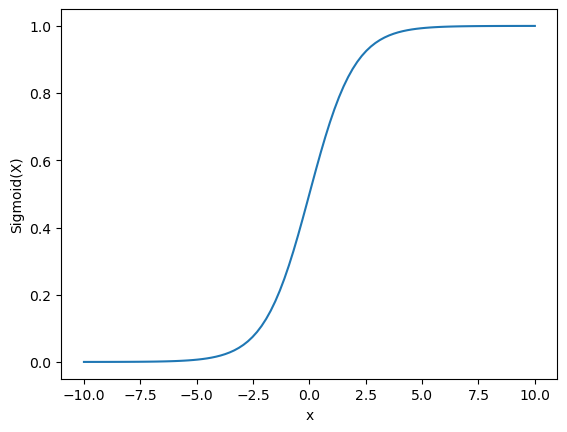

In [166]:
# Sigmoid 함수 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))


x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

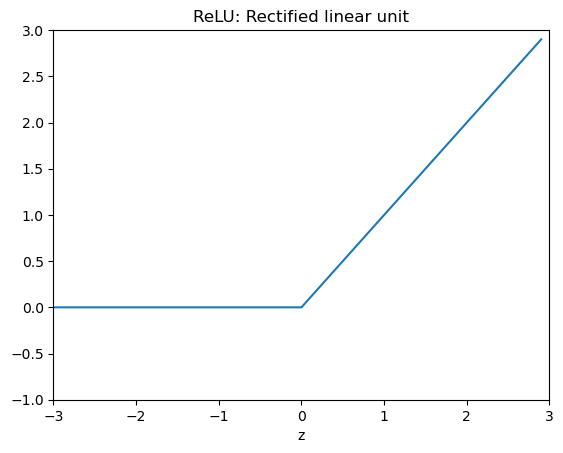

<Figure size 640x480 with 0 Axes>

In [167]:
# ReLU 함수 구현
def ReLU(x):
    return np.where(x>0,x,0)

x = np.arange(-3, 3, .1)
y = ReLU(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [168]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [169]:
# 순전파 함수 정의
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['B1'], network['B2']

 # 아래 빈칸 채워주세요
  a1 = x@W1 + b1
  z1 = ReLU(a1)
  a2 = z1@W2 + b2

  y = a2
  return y

In [170]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[1.2405 2.1765]


## 직접 신경망 만들어보기

In [171]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(405)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [172]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    return 1 /(1+np.exp(-net))



# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig * (1-sig)  ##여기에 도함수 구현

In [173]:
# 초기 가중치
W = [0.40316676, -0.44345216]

# 입력 데이터와 가중치 연산
Z = (X @ W + b).reshape(-1,1)                #Feedforward 연산 참고하여 코드 작성
print(Z) #shape 맞출것

"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""

[[1.        ]
 [0.55654784]
 [1.40316676]
 [0.9597146 ]]


'\narray([[1.        ],\n       [0.55654784],\n       [1.40316676],\n       [0.9597146 ]])\n'

In [174]:
# A: 출력(activated outputs)
A = sigmoid(Z)
print(A)

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""

[[0.73105858]
 [0.6356534 ]
 [0.80268592]
 [0.72306466]]


'\narray([[0.73105858],\n       [0.6356534 ],\n       [0.80268592],\n       [0.72306466]])\n'

## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [194]:
def backpropagation(Y, A, Z):

    da = -(Y - A)
    dz = da * (A*(1-A))

    dw = np.dot(dz.T, X).reshape(-1,1)
    db = np.sum(dz,keepdims=True)
    return dz,dw,db

dz, dw, db = backpropagation(Y, A, Z)

print("dz : \n", dz, "\n")
print("dw : \n", dw, "\n")
print("db : \n", db, "\n")

"""
dz :
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]]

dw :
 [[-0.08670498]
 [-0.13983613]]

db :
 [[-0.02735214]]    ##오류수정##
"""

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 [[-0.02735214]] 



'\ndz :\n [[ 0.14373484]\n [-0.084382  ]\n [-0.03125085]\n [-0.05545413]]\n\ndw :\n [[-0.08670498]\n [-0.13983613]]\n\ndb :\n [[-0.02735214]]    ##오류수정##\n'

In [195]:
##shape이 맞지 않다면 추가로 코드 작성해주세요.
print("기존 가중치: \n", W, "\n")
W = np.array(W).reshape(-1,1)
"""
기존 가중치:
 [[ 0.40316676]
 [-0.44345216]]
"""

기존 가중치: 
 [0.40316676, -0.44345216] 



'\n기존 가중치:\n [[ 0.40316676]\n [-0.44345216]]\n'

In [196]:
# 가중치 업데이트(batch)

W -= dw    ##오류수정##
b -= db    ##오류수정##

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

"""   ##오류수정##
업데이트 후 가중치:
 [[ 0.48987174]
 [-0.30361603]]

업데이트 후 bias:
 [[1.02735214]]
"""

업데이트 후 가중치: 
 [[ 0.48987174]
 [-0.30361603]] 

업데이트 후 bias: 
 [[1.02735214]] 



'   ##오류수정##\n업데이트 후 가중치:\n [[ 0.48987174]\n [-0.30361603]]\n\n업데이트 후 bias:\n [[1.02735214]]\n'

In [198]:
X.shape

(4, 2)

In [200]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
W = np.array(W).reshape(-1,1)
# W = np.zeros((2,1)) → shape 맞춰주세요


b = 0

print('학습 전 가중치: \n', W, "\n")

history = []

# 가중치 업데이트 1,000회 (1,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X,W) + b
    A = sigmoid(Z)

    Loss = np.mean((A-Y)**2)
    history.append(Loss)

    # 역방향 전파(기울기 계산)
    dz, dw, db = backpropagation(Y, A, Z)

    W -= dw   ##오류수정##
    b -= db   ##오류수정##

print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""   ##오류수정##
학습 전 가중치: 
 [[-0.79003947]
 [ 0.6826574 ]] 
 
학습 후 가중치:
 [[6.17943355]
 [6.17961387]]

학습 후 bias:
 [[-2.84359407]]

학습 후 예측값:
 [[0.055]
 [0.966]
 [0.966]
 [1.   ]]
"""

학습 전 가중치: 
 [[-0.79003947]
 [ 0.6826574 ]] 

학습 후 가중치: 
 [[6.17943355]
 [6.17961387]] 

학습 후 bias: 
 [[-2.84359407]] 

학습 후 예측값: 
 [[0.055]
 [0.966]
 [0.966]
 [1.   ]] 



'   ##오류수정##\n학습 전 가중치: \n [[-0.79003947]\n [ 0.6826574 ]] \n \n학습 후 가중치:\n [[6.17943355]\n [6.17961387]]\n\n학습 후 bias:\n [[-2.84359407]]\n\n학습 후 예측값:\n [[0.055]\n [0.966]\n [0.966]\n [1.   ]]\n'

Text(0, 0.5, 'Loss')

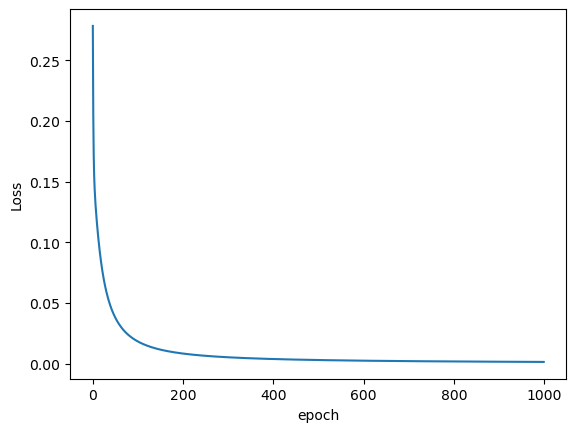

In [201]:
# Loss 눈으로 확인하기
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('Loss')

## IRIS DATA PERCEPTRON 학습예제

In [202]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

/var/folders/f2/djy34npd0sd27zzb2_6gnjvh0000gn/T/ipykernel_70785/1979420576.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [203]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

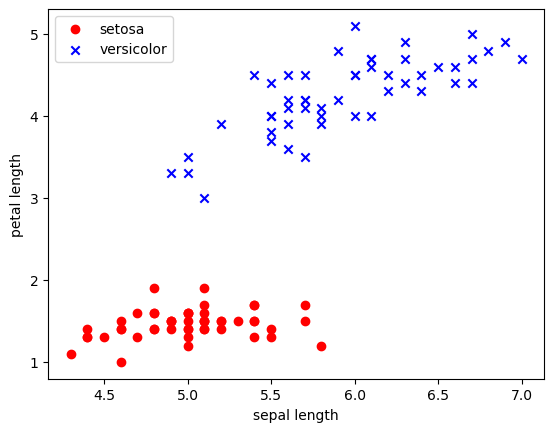

In [204]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
print(y)
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""

# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""

# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
print(X.shape)
"""
(100, 2)
"""

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

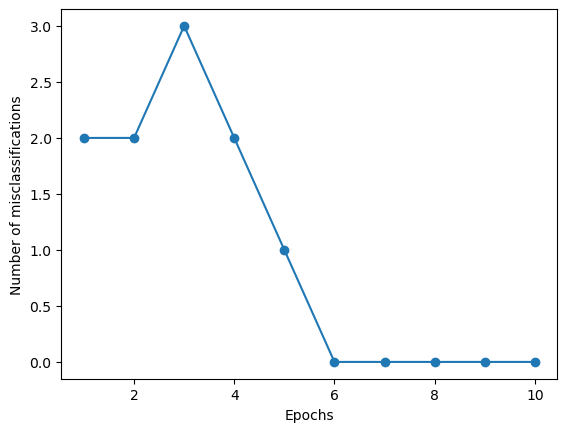

In [214]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

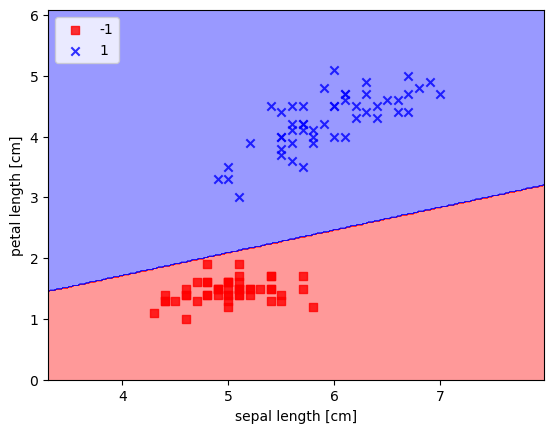

In [215]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다